In [4]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [8]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data();

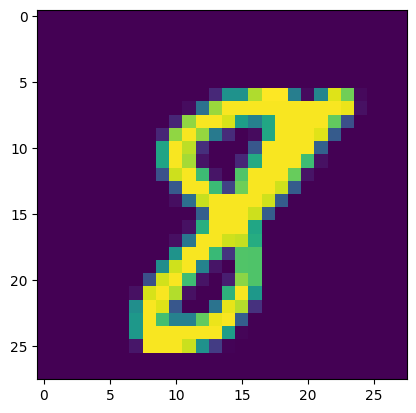

In [7]:
plt.imshow(train_data[55])

In [9]:
train_labels[55]

8

In [10]:
#creamos el modelo
model = models.Sequential()
#agregamos las capas, con la siguiente estructura (Nneuronas, funcion de activacion)
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))

In [11]:
model.compile(optimizer= 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [12]:
#aqui se pueden sacar mas detalles del modelo que tenenmos
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#bajamos la dimensionalidad para trabajar unicamente con 2 dimensiones
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [17]:
#aplicamos one hot encoder a las y
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
#Entrenamos el modelo
model.fit(x_train, y_train, epochs= 5, batch_size= 128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2635 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0390 - accuracy: 0.9883


In [19]:
#Evaluamos la presicion de la red
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9800


[0.06562645733356476, 0.9800000190734863]